# Project Objective -  Predicting the mortagage backed securities prepayment risk using Machine learning Models. 

# We use Logistic Regression and Naive Bayes Models.

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# Loading and reading dataset

In [2]:
# Reading data file
df = pd.read_csv('LoanExport.csv')
# display all Features present in the dataFrame
pd.set_option('display.max_columns', None)
df

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

        MIP  Units Occupancy  OCLTV  DTI  OrigUPB  LTV  OrigInterestRate  \
0        25      1         O     89   27   117000   89             6.750   
1         0      1         O     73   17   109000   73             6.500   
2         0      1         O     75   16    88000   75             6.875   
3         0      1         O     76   14   160000   76             6.875   
4         0      1         O     78   18   109000   78             7.125   
...     ...    ...       ...    ...  ...      ...  ...               ...   
291446    0      1         O     60   32    90000   60             7.000   
291447    0      1         O     73    0   267000   73             6.375   
291448    0      1         O     73   31    87000   73             5.625   
291449    0      1         I     80   54    88000   80             7.000   
291450    0      1         O     47   29    70000   47             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0                 0   
4       GMACMTGECORP                  

# Column Description

CreditScore: The credit score of the borrower(s) at the time the mortgage loan was originated. This is an important factor in determining creditworthiness.

FirstPaymentDate: The date when the first payment on the mortgage loan is due.

FirstTimeHomebuyer: A binary variable indicating whether the borrower is a first-time homebuyer.

MaturityDate: The date when the mortgage loan is scheduled to be fully repaid.

MSA: Metropolitan Statistical Area, which provides information about the geographical area where the property is located.

MIP: Mortgage Insurance Premium, which may be required for certain loans with a low down payment.

Units: The number of housing units in the property (e.g., single-family, multi-unit property).

Occupancy: The occupancy status of the property (e.g., owner-occupied, non-owner-occupied).

OCLTV: Original Combined Loan-to-Value ratio, which indicates the ratio of the loan amount to the appraised value of the property at the time of origination.

DTI: Debt-to-Income ratio, which measures the borrower's debt obligations relative to their income.

OrigUPB: Original Unpaid Principal Balance, which is the initial loan amount when the mortgage was originated.

LTV: Loan-to-Value ratio, indicating the ratio of the loan amount to the property's current appraised value.

OrigInterestRate: The original interest rate at which the mortgage loan was issued.

Channel: The channel through which the mortgage loan was originated (e.g., retail, wholesale, correspondent).

PPM: Property Preservation and Maintenance program, indicating whether the property is subject to such a program.

ProductType: The type of mortgage product (e.g., fixed-rate, adjustable-rate, etc.).

PropertyState: The state where the property securing the mortgage loan is located.

PropertyType: The type of property (e.g., single-family, condominium, etc.).

PostalCode: The postal code or ZIP code of the property.

LoanSeqNum: A unique identifier for the mortgage loan.

LoanPurpose: The purpose of the mortgage loan (e.g., purchase, refinance).

OrigLoanTerm: The original term (in months) of the mortgage loan.

NumBorrowers: The number of borrowers on the mortgage loan.

SellerName: The name of the organization that sold the mortgage to the entity maintaining the dataset.

ServicerName: The name of the organization servicing the mortgage loan.

EverDelinquent: A binary variable indicating whether the mortgage loan has ever been delinquent.

MonthsDelinquent: The number of months the mortgage loan has been delinquent.

MonthsInRepayment: The number of months the mortgage loan has been in repayment.

# Assuming 'EverDelinquent' is your target variable.

# Data Preparation for model buidling.

In [3]:
# Checking shape of dataFrame
x = df.shape
print(f'The Dataset has {x[0]} rows and {x[1]} columns ')

The Dataset has 291451 rows and 28 columns 


In [4]:
# Checking datatypes of each features that present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

# Let’s see whether we have missing value or not

In [5]:
# Checking Null/missing values
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

### Here, there are  24,994 Null Values in 'SellerName' feature

In [6]:
# Checking Count Values in 'SellerName' column
s = df['SellerName'].value_counts()
s

# percentage of null value 
df["SellerName"].isnull().sum()/df["SellerName"].count()*100

9.380125123378257

### 9.31% of values are missing only in seller name so we could drop it or fixed it.

# Fixing Null Values

In [7]:
# Fixing Null/missing values in 'SellerName' column
df = df.fillna({'SellerName': s.values[0]})
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

### Here, we have fixed null values with 0 index now No null values is there.

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# Drop duplicates values
df.drop_duplicates()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

        MIP  Units Occupancy  OCLTV  DTI  OrigUPB  LTV  OrigInterestRate  \
0        25      1         O     89   27   117000   89             6.750   
1         0      1         O     73   17   109000   73             6.500   
2         0      1         O     75   16    88000   75             6.875   
3         0      1         O     76   14   160000   76             6.875   
4         0      1         O     78   18   109000   78             7.125   
...     ...    ...       ...    ...  ...      ...  ...               ...   
291446    0      1         O     60   32    90000   60             7.000   
291447    0      1         O     73    0   267000   73             6.375   
291448    0      1         O     73   31    87000   73             5.625   
291449    0      1         I     80   54    88000   80             7.000   
291450    0      1         O     47   29    70000   47             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0                 0   
4       GMACMTGECORP                  

In [10]:
df.drop

<bound method DataFrame.drop of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964

In [11]:
int_cols=[]
for i in df.columns:
    if df[i].dtype == "int64":
        int_cols.append(i)
        
int_cols

['CreditScore',
 'FirstPaymentDate',
 'MaturityDate',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']


# Converting Datatype integer into datetime

In [12]:
# importing datatime module
from datetime import datetime

# df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format = '%Y%m')
# df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format = '%Y%m')

In [13]:
df['Occupancy'] = df['Occupancy'].replace({'O': '0', 'I': '1'}, regex=True)

In [14]:
df['NumBorrowers'].unique()
df['NumBorrowers'] = df['NumBorrowers'].replace({'X': '2'})

# Statistical Analysis

In [15]:
# performing describe function on the numerical features
df.describe()

CreditScore  FirstPaymentDate   MaturityDate            MIP  \
count  291451.000000     291451.000000  291451.000000  291451.000000   
mean      708.936991     199904.760553  202902.367043       9.216685   
std        68.408791         13.821228      16.090508      12.648273   
min         0.000000     199901.000000  202402.000000       0.000000   
25%       675.000000     199903.000000  202902.000000       0.000000   
50%       717.000000     199904.000000  202903.000000       0.000000   
75%       753.000000     199905.000000  202904.000000      25.000000   
max       849.000000     201303.000000  204302.000000      55.000000   

               Units          OCLTV            DTI        OrigUPB  \
count  291451.000000  291451.000000  291451.000000  291451.000000   
mean        1.026022      76.960529      30.033453  124940.387921   
std         0.202986      15.236154      13.203974   53657.440624   
min         0.000000       0.000000       0.000000    8000.000000   
25%         1.000000      70.000000      22.000000   83000.000000   
50%         1.000000      80.000000      31.000000  117000.000000   
75%         1.000000      90.000000      39.000000  160000.000000   
max         4.000000     110.000000      65.000000  497000.000000   

                 LTV  OrigInterestRate   OrigLoanTerm  EverDelinquent  \
count  291451.000000     291451.000000  291451.000000   291451.000000   
mean       76.937986          6.926547     359.835375        0.197848   
std        15.225298          0.343541       2.286939        0.398378   
min         0.000000          4.000000     301.000000        0.000000   
25%        70.000000          6.750000     360.000000        0.000000   
50%        80.000000          6.875000     360.000000        0.000000   
75%        90.000000          7.125000     360.000000        0.000000   
max       103.000000         12.350000     361.000000        1.000000   

       MonthsDelinquent  MonthsInRepayment  
count     291451.000000      291451.000000  
mean           1.837729          60.805291  
std            8.809392          46.142599  
min            0.000000           1.000000  
25%            0.000000          34.000000  
50%            0.000000          48.000000  
75%            0.000000          63.000000  
max          180.000000         212.000000

### Above there are some outliers in features.

# Check for the presence of outliers and handle them with appropriate techniques - Box Plot

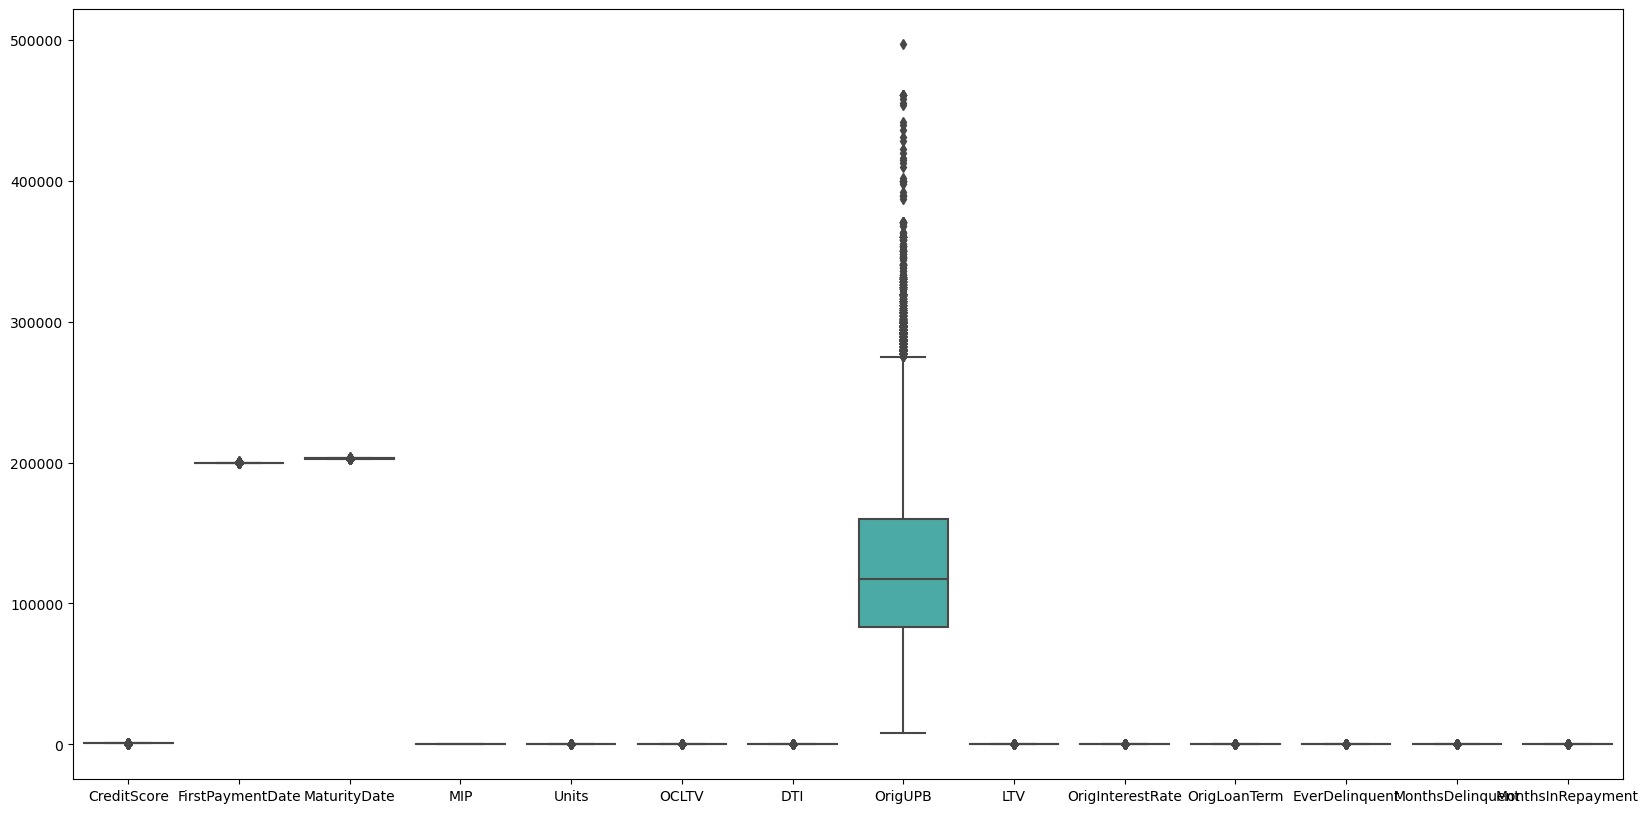

In [16]:
# Ploting a Box Plot for checking Outliers in each feature.
plt.figure(figsize = (20,10))
sns.boxplot(data=df)
plt.show()


### There are outliers in OrigUPB, MIP, OCLTV, DTI and LTV features so we need to remove it.

In [17]:
# Create a function to remove outliers.
def remove_outlier(col):  
    col = np.sort(col)  # Sort the array in-place
    Q1, Q3 = np.percentile(col, [25, 75]) 
    IQR = Q3 - Q1 #Interquartile Range
    lower_ex = Q1 - (1.5 * IQR) #lower Extreme
    upper_ex = Q3 + (1.5 * IQR) #Upper Extreme
    return lower_ex, upper_ex

for column in df[['OrigUPB',
 'MIP',
 'OCLTV',
 'DTI',
 'LTV']].columns:
    lx,ux = remove_outlier(df[column])
    df[column] = np.where(df[column]> ux,ux,df[column])
    df[column] = np.where(df[column]< lx,lx,df[column])

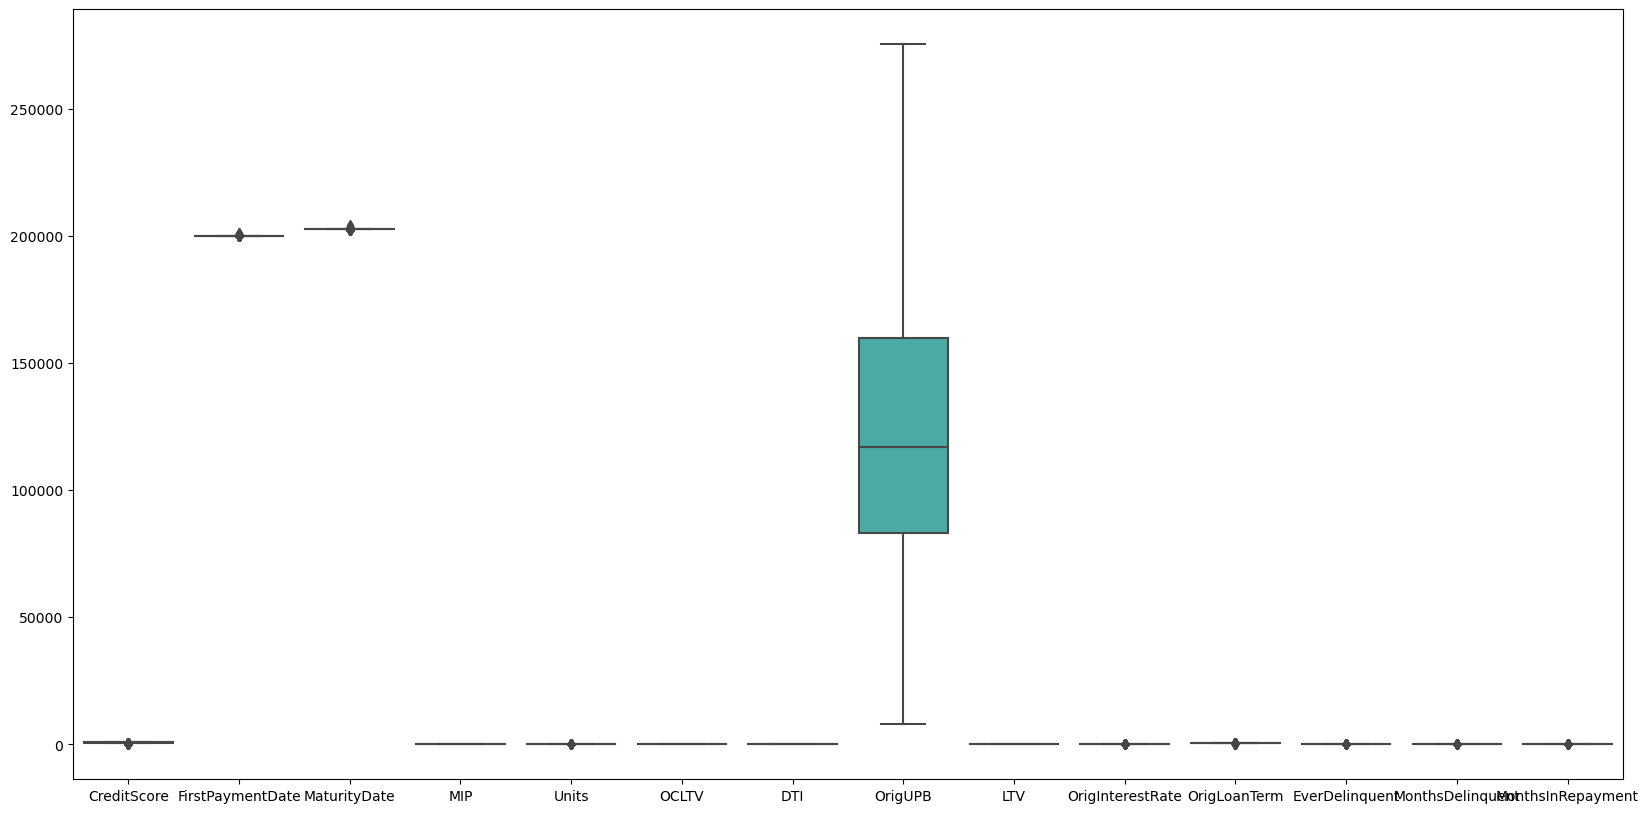

In [18]:
# Creating plot
plt.figure(figsize = (20,10))
sns.boxplot(data=df)
plt.show()

### Now all Outliers are removed in OrigUPB, MIP, OCLTV, DTI and LTV  features.

In [19]:
# Check unique values each features
# Listing  values whose count is less than 25
for column in df.columns:
  result = len(df[column].unique())
  print(f"\nUnique Variables in {column} column are: {result}")
  data_type = df[column].dtype
  print('Datatype :',data_type)
  if result<25:
    x = df[column].unique()
    print('The unique values are: ', x )


Unique Variables in CreditScore column are: 370
Datatype : int64

Unique Variables in FirstPaymentDate column are: 66
Datatype : int64

Unique Variables in FirstTimeHomebuyer column are: 3
Datatype : object
The unique values are:  ['N' 'X' 'Y']

Unique Variables in MaturityDate column are: 96
Datatype : int64

Unique Variables in MSA column are: 392
Datatype : object

Unique Variables in MIP column are: 37
Datatype : float64

Unique Variables in Units column are: 5
Datatype : int64
The unique values are:  [1 2 4 3 0]

Unique Variables in Occupancy column are: 3
Datatype : object
The unique values are:  ['0' '1' 'S']

Unique Variables in OCLTV column are: 67
Datatype : float64

Unique Variables in DTI column are: 66
Datatype : float64

Unique Variables in OrigUPB column are: 269
Datatype : float64

Unique Variables in LTV column are: 62
Datatype : float64

Unique Variables in OrigInterestRate column are: 254
Datatype : float64

Unique Variables in Channel column are: 4
Datatype : objec

In [20]:
# def ApplyOneHotEncoder(df, col_name):
#       ohe = OneHotEncoder(sparse = False)
#       encodings = ohe.fit_transform(df[[col_name]])
#       columns = [col_name + "" + categorie  for categorie in ohe.categories[0]]
#       encodings = pd.DataFrame(encodings , columns = columns)
 
#       df = pd.concat([df, encodings],axis = 1)
#       df.drop([col_name], axis = 1, inplace = True)
#       return df

# Exploratory Data Analysis

# Univariat Analysis

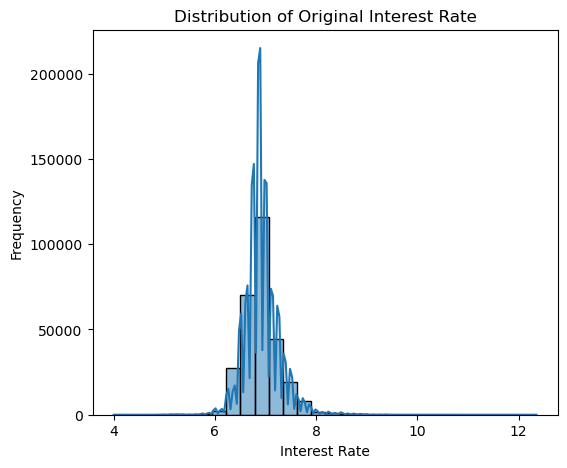

In [21]:
# Distribution of Original Interest Rate using Hisplot
plt.figure(figsize=(6, 5))
sns.histplot(df['OrigInterestRate'], bins=30, kde=True)
plt.title('Distribution of Original Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

### Above Highest Interest Rate in between 6.5% to 7%.

In [22]:
# Checking value counts with 'EverDelinquent' feature.
EverDelinquent_count = df['EverDelinquent'].value_counts()
EverDelinquent_count

0    233788
1     57663
Name: EverDelinquent, dtype: int64

# Ploting Countplot

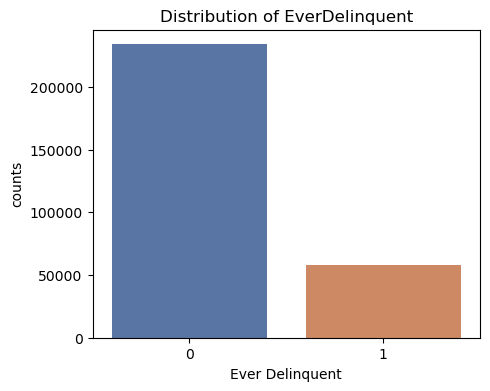

In [23]:
# Ploting countplot to check how many marked as YES and how many as NO.
plt.figure(figsize = (5,4))
sns.countplot(data = df , x = 'EverDelinquent' , palette = 'deep')
plt.title('Distribution of EverDelinquent')
plt.xlabel('Ever Delinquent')
plt.ylabel('counts')
plt.show()


### Above '1' indicating Delinquent Loan & '0' indicateing Non-Delinquent Loan

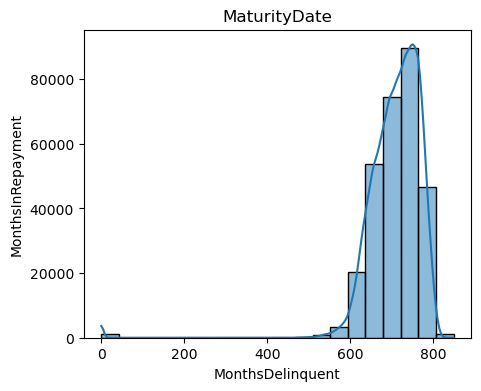

In [24]:
#Histogram of loan amounts
plt.figure(figsize=(5, 4))
sns.histplot(df['CreditScore'], bins=20, kde=True)
plt.title("MaturityDate")
plt.xlabel("MonthsDelinquent")
plt.ylabel("MonthsInRepayment")
plt.show()

# Explore and visualize categorical variables using count plots.

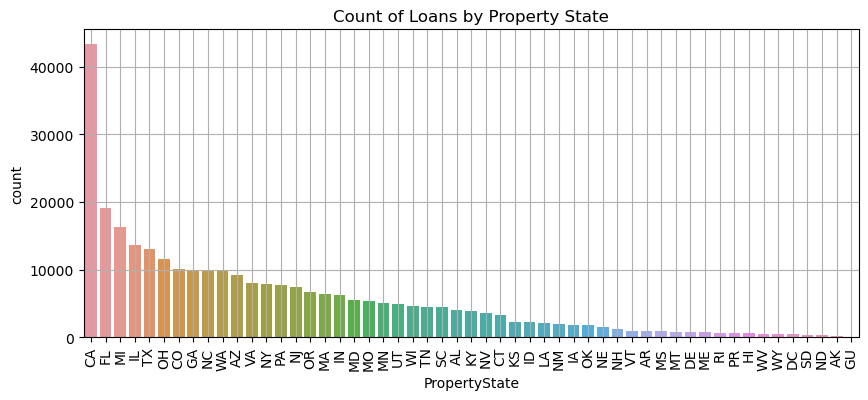

In [25]:
plt.figure(figsize = (10,4))
sns.countplot(data = df , x = 'PropertyState', order = df['PropertyState'].value_counts().index)
plt.title('Count of Loans by Property State')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Above we can see that the highest Count of Loan with 'CA' State.

# Distribution of FirstTimeHomebuyer - Count Plot 

In [26]:
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='firstTime_Homebuyer', palette='pastel')
# plt.title('Distribution of FirstTimeHomebuyer')
# plt.xlabel('First Time Home buyer')
# plt.ylabel('Count')
# plt.show()

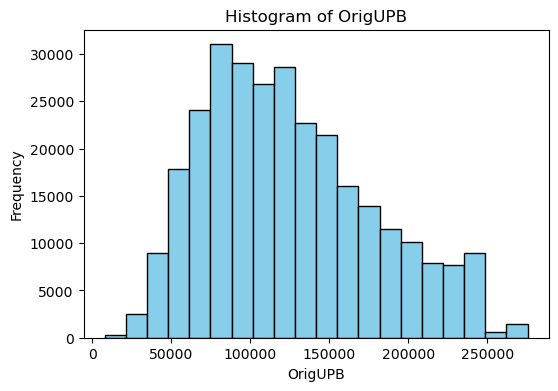

In [27]:
plt.figure(figsize=(6, 4))
plt.hist(df['OrigUPB'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of OrigUPB')
plt.xlabel('OrigUPB')
plt.ylabel('Frequency')
plt.show()

# key_variables - subplots

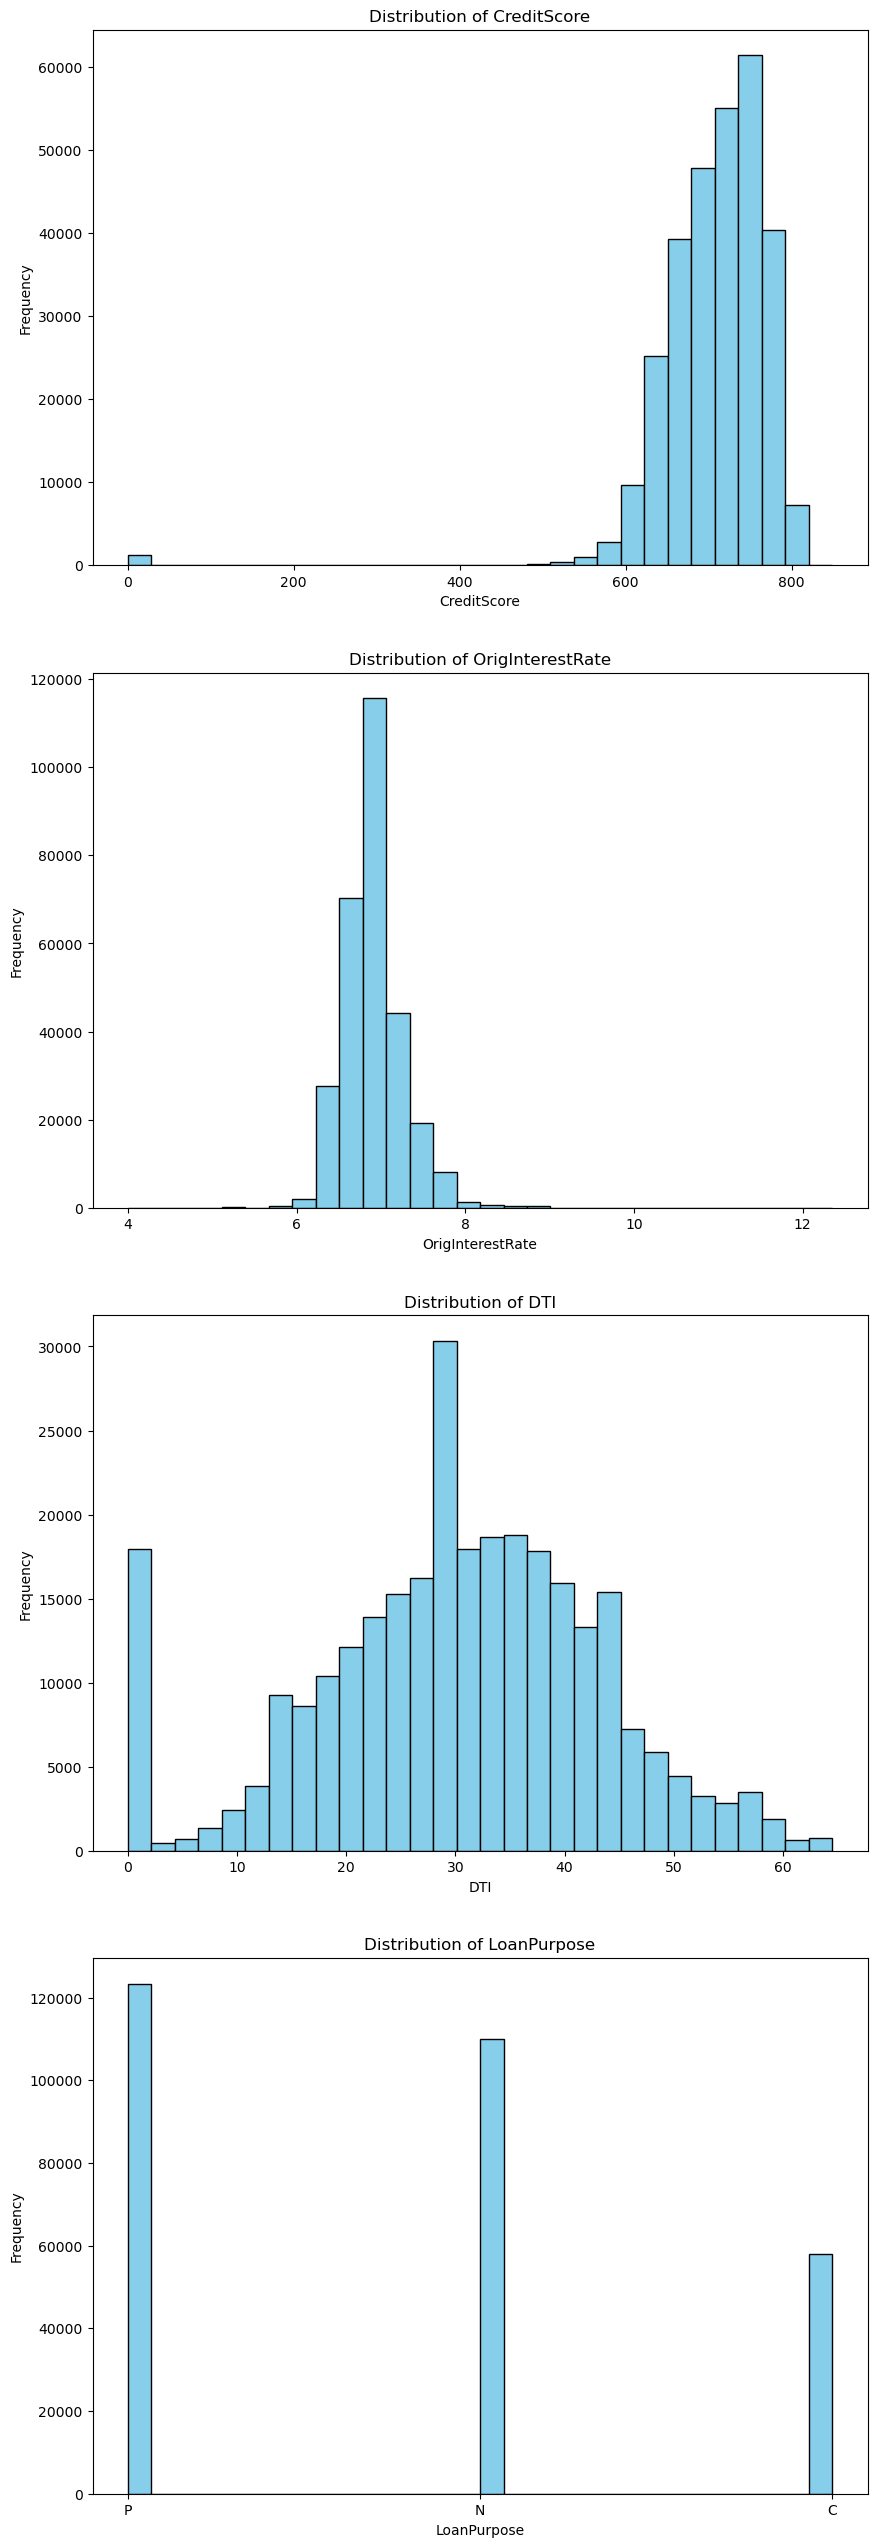

In [28]:
key_variables = ['CreditScore', 'OrigInterestRate', 'DTI', 'LoanPurpose']
fig, axes = plt.subplots(nrows=len(key_variables), ncols=1, figsize=(10, 8 * len(key_variables)))
for i, variable in enumerate(key_variables):
    ax = axes[i]
    ax.hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
    

In [29]:
# key_variables = ['CreditScore_range', 'OrigInterestRate', 'DTI', 'LoanPurpose']
# fig, axes = plt.subplots(nrows=len(key_variables), ncols=1, figsize=(10, 8 * len(key_variables)))
# for i, variable in enumerate(key_variables):
#     ax = axes[i]
#     ax.hist(df[variable], bins=30, color='skyblue', edgecolor='black')
#     ax.set_title(f'Distribution of {variable}')
#     ax.set_xlabel(variable)
#     ax.set_ylabel('Frequency')

# Bivariate Analysis

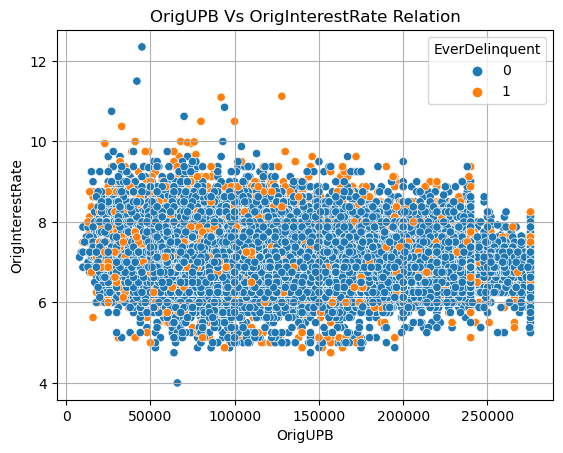

In [30]:
sns.scatterplot(data = df, x = 'OrigUPB', y = 'OrigInterestRate', hue = 'EverDelinquent', color='blues')
plt.title('OrigUPB Vs OrigInterestRate Relation')
plt.grid()
plt.show()

# Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

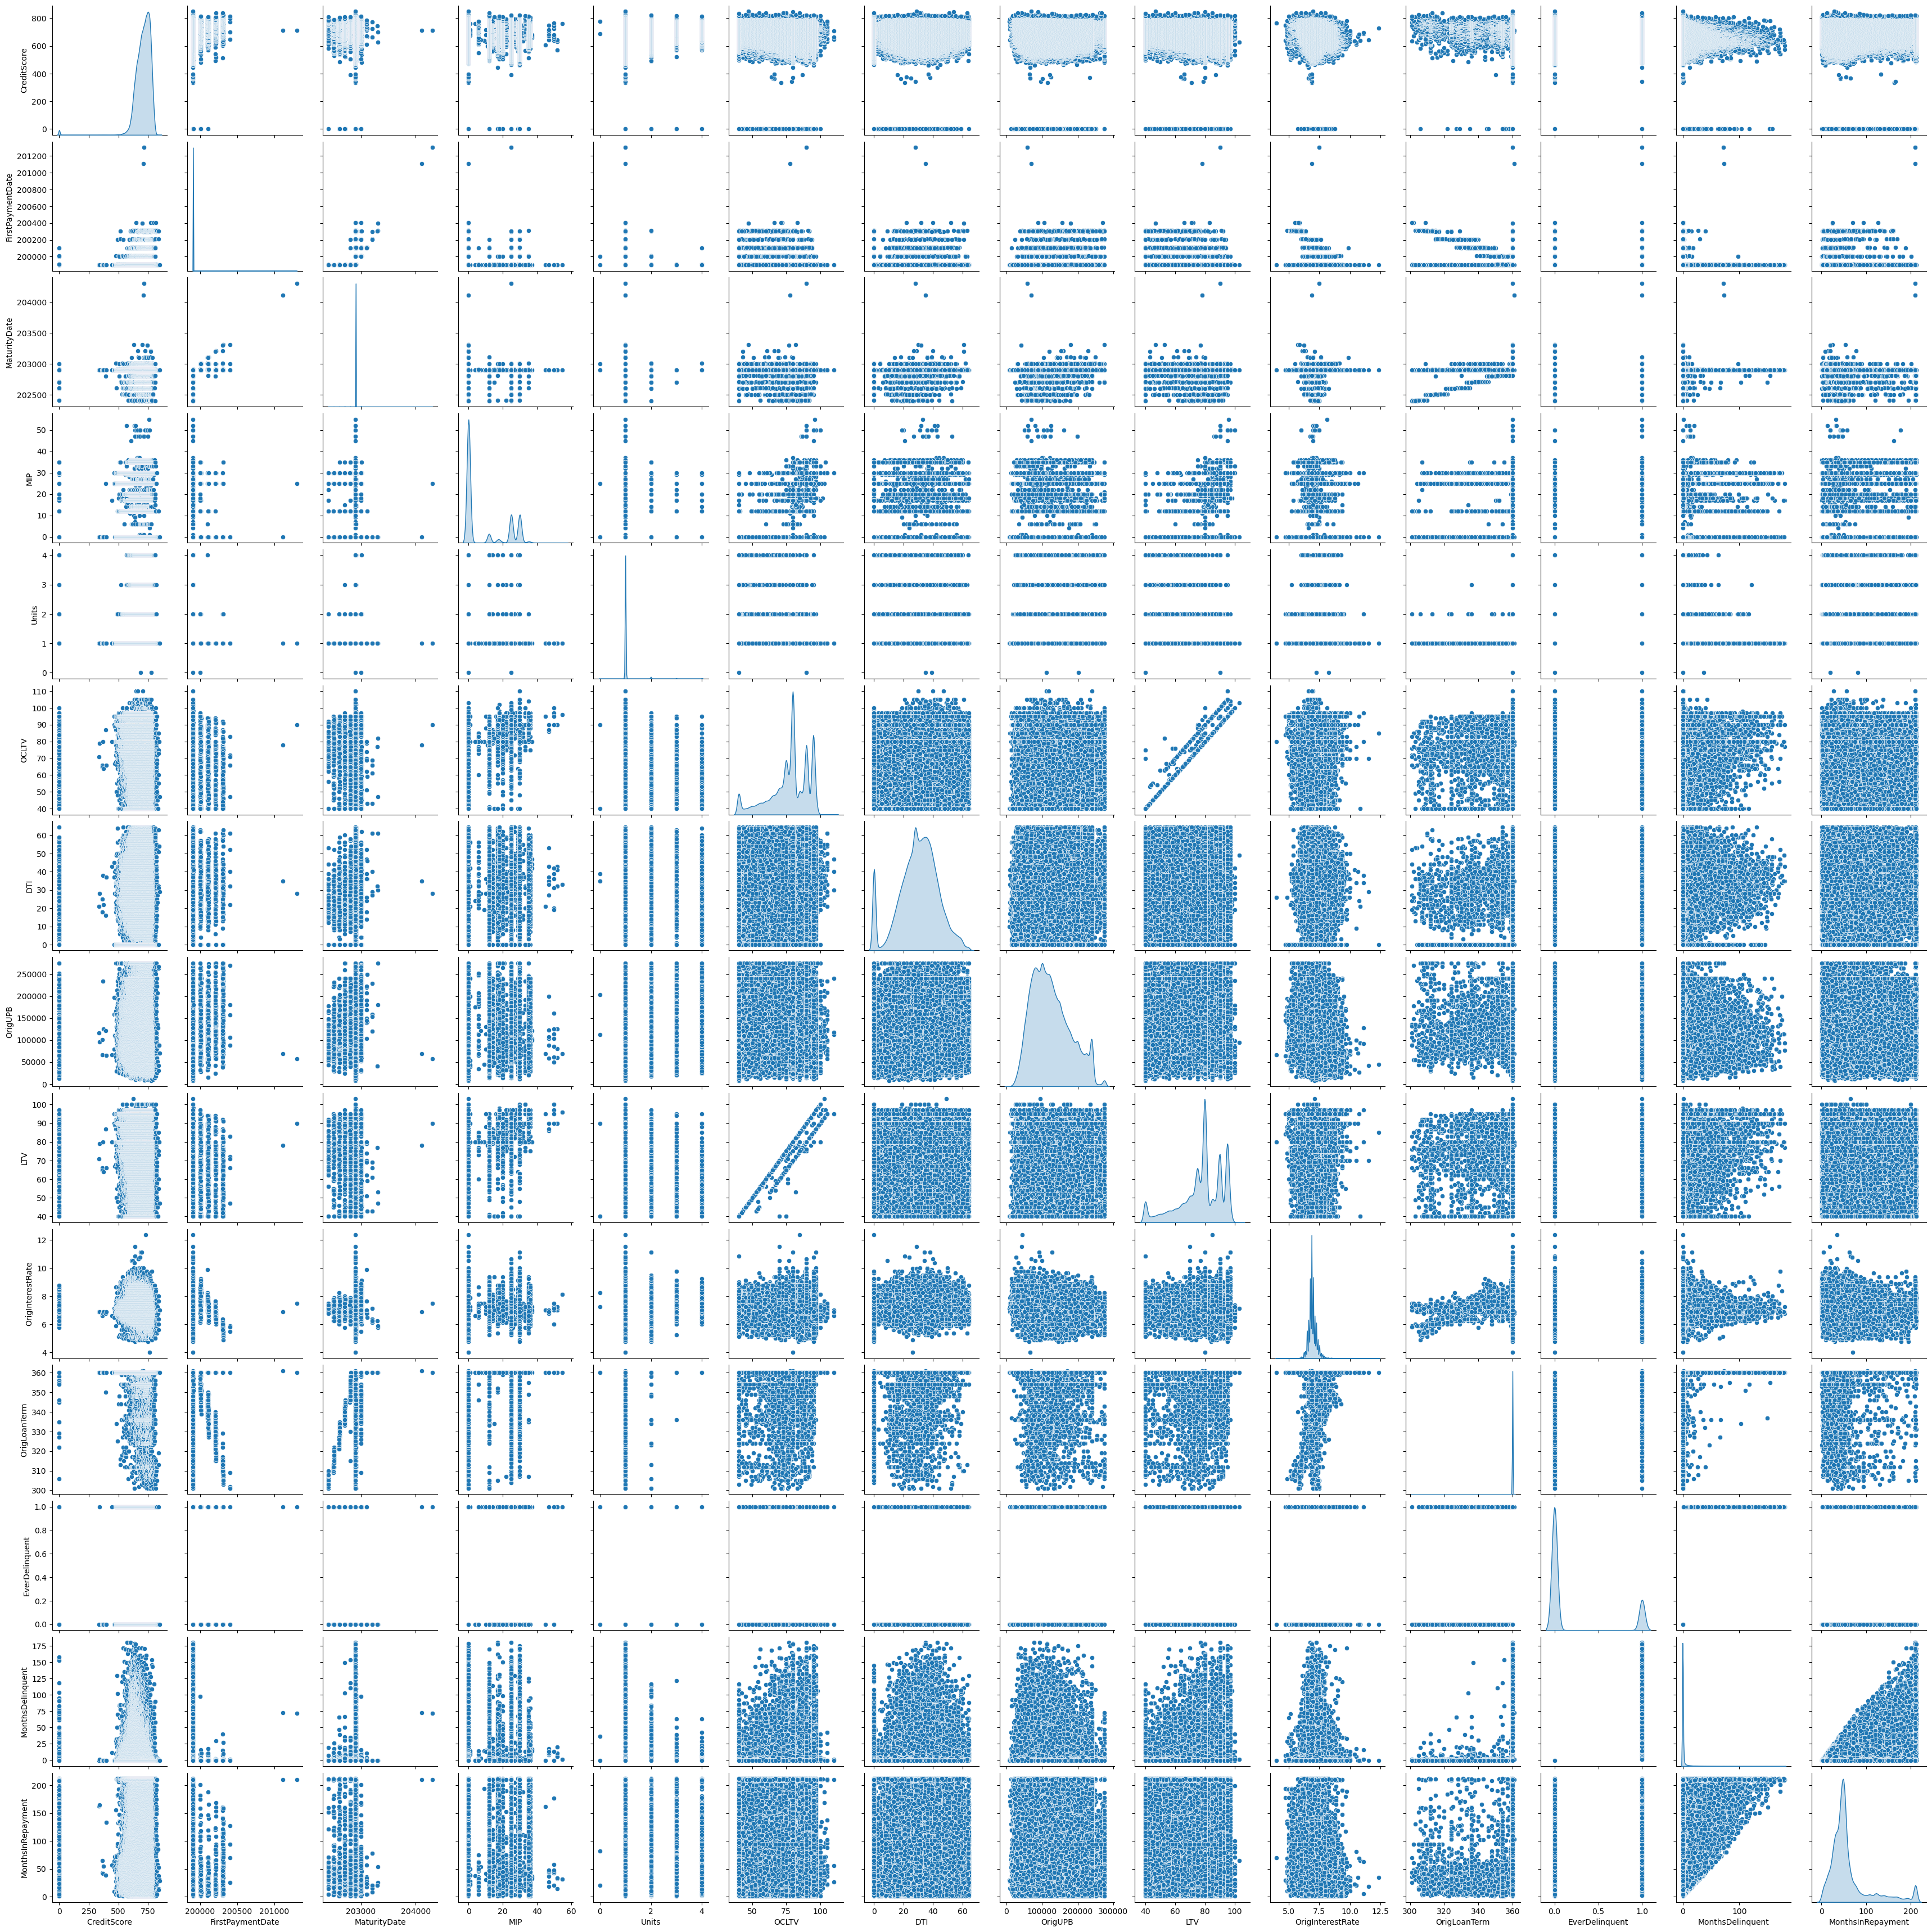

In [31]:
# create pairplot on the all numeric featurs
plt.figure(figsize = (15,15))
sns.pairplot(df , diag_kind = 'kde')
plt.show()

# Correlation matrix - Heatmap

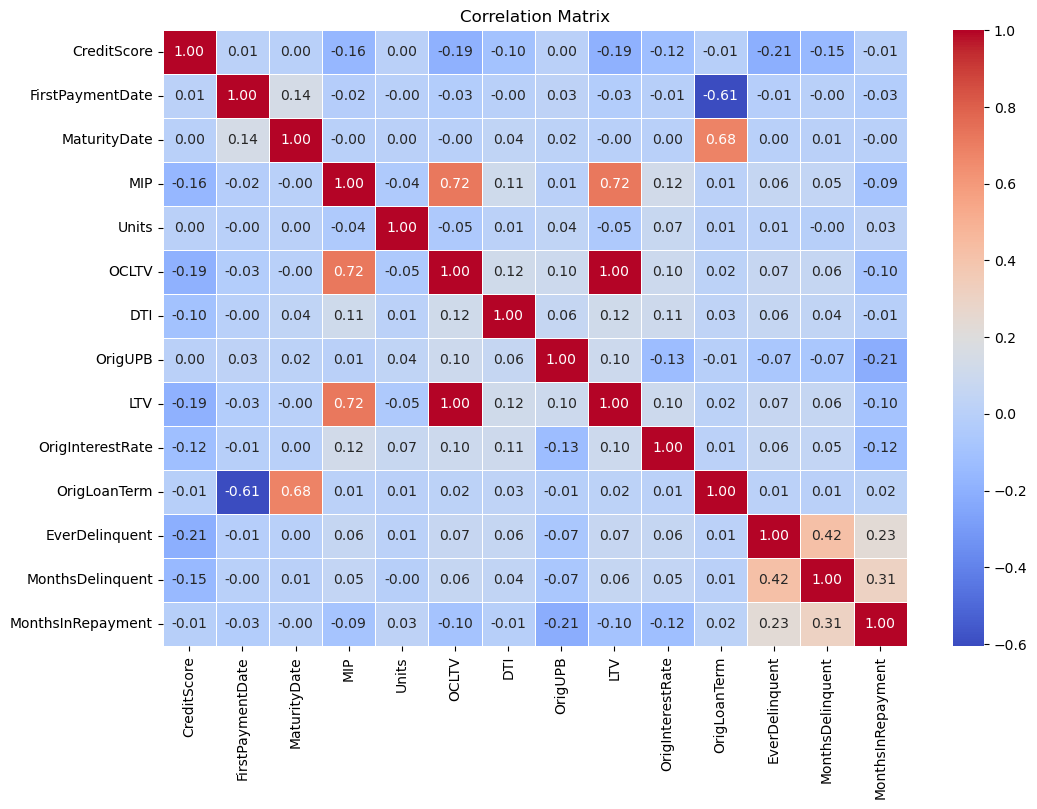

In [32]:
# Create heatmap 
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidth =.5)
plt.title('Correlation Matrix')
plt.show()

### Positive correlations- Stronge correlation relationship between MIP with OCLTV & LTV  that is 0.72 and  OrigLoanTerm with MaturityDate which is 0.68 represented such as orange.

# Data Bucketing

# CreditScore_range

In [33]:
# Create a function to create Range on top of 'Credit Score' feature
def CreditScore_range(CreditScore):
    if (CreditScore <= 500):
        return 'Poor'
    elif (CreditScore <= 650):
        return 'Fair'
    elif (CreditScore <= 750):
        return 'Good'
    elif (CreditScore <= 850):
        return 'Excellent'
    else:
         return 'NA' 
        
# Apply the function to create a new 'CreditScore_range' column        
df['CreditScore_range'] = df['CreditScore'].apply(CreditScore_range)
df

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

         MIP  Units Occupancy  OCLTV   DTI   OrigUPB   LTV  OrigInterestRate  \
0       25.0      1         0   89.0  27.0  117000.0  89.0             6.750   
1        0.0      1         0   73.0  17.0  109000.0  73.0             6.500   
2        0.0      1         0   75.0  16.0   88000.0  75.0             6.875   
3        0.0      1         0   76.0  14.0  160000.0  76.0             6.875   
4        0.0      1         0   78.0  18.0  109000.0  78.0             7.125   
...      ...    ...       ...    ...   ...       ...   ...               ...   
291446   0.0      1         0   60.0  32.0   90000.0  60.0             7.000   
291447   0.0      1         0   73.0   0.0  267000.0  73.0             6.375   
291448   0.0      1         0   73.0  31.0   87000.0  73.0             5.625   
291449   0.0      1         1   80.0  54.0   88000.0  80.0             7.000   
291450   0.0      1         0   47.0  29.0   70000.0  47.0             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0            

In [34]:
# check Value counts and create dataframe.
cdf = df['CreditScore_range'].value_counts()
cdf = cdf.reset_index().rename(columns = {'index': 'CreditScore_range', 'CreditScore_range' : 'Counts'})
cdf

CreditScore_range  Counts
0              Good  173731
1         Excellent   77319
2              Fair   39137
3              Poor    1264

In [35]:
# check unique value.
l = df['LTV'].unique()
print('The unique values are: ', l )

The unique values are:  [ 89.  73.  75.  76.  78.  90.  72.  95.  80.  77.  85.  93.  70.  74.
  79.  62.  44.  40.  64.  91.  53.  69.  60.  54.  52.  84.  68.  55.
  96.  97.  46.  58.  63.  83.  87.  94.  86.  50.  45.  71.  61.  42.
  59.  57.  48.  51.  67.  81.  66.  82.  88.  65.  41.  92.  56.  43.
  47. 100.  49.  98. 103.  99.]


# LTV_Range

In [36]:
# Create a function to create 'LTV Range' on top of LTV feature
def LTV_Range(LTV):
    if (LTV <= 25):
        return 'Low'
    elif (LTV <= 45):
        return 'Medium'
    else:
         return 'High'
        
# Apply the function to create a new 'LTV_Range' column       
df['LTV_Range'] = df['LTV'].apply(LTV_Range)
df

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

         MIP  Units Occupancy  OCLTV   DTI   OrigUPB   LTV  OrigInterestRate  \
0       25.0      1         0   89.0  27.0  117000.0  89.0             6.750   
1        0.0      1         0   73.0  17.0  109000.0  73.0             6.500   
2        0.0      1         0   75.0  16.0   88000.0  75.0             6.875   
3        0.0      1         0   76.0  14.0  160000.0  76.0             6.875   
4        0.0      1         0   78.0  18.0  109000.0  78.0             7.125   
...      ...    ...       ...    ...   ...       ...   ...               ...   
291446   0.0      1         0   60.0  32.0   90000.0  60.0             7.000   
291447   0.0      1         0   73.0   0.0  267000.0  73.0             6.375   
291448   0.0      1         0   73.0  31.0   87000.0  73.0             5.625   
291449   0.0      1         1   80.0  54.0   88000.0  80.0             7.000   
291450   0.0      1         0   47.0  29.0   70000.0  47.0             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0            

In [37]:
# Check value count and create dataframe.
ldf = df['LTV_Range'].value_counts()
ldf = ldf.reset_index().rename(columns = {'index': 'LTV_Range', 'LTV_Range': 'Counts'})
ldf

LTV_Range  Counts
0      High  277098
1    Medium   14353

In [38]:
# check unique values that how many unique values are there.
df['MonthsInRepayment'].unique()

array([ 52, 144,  67,  35,  54,  42,  44, 145,  64, 212,  37,  47,  53,
        55,  66,  26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56,
       118,  63,  24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,
        76,  49,  18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,
        62,  14,  15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165,
       156,  33,  68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134,
        74,   9,  34,  77, 170, 122,  69,  72, 206, 148, 153, 101, 180,
         8,  32,   5, 207,   7, 128,  71,  65,  79, 174, 195, 151, 149,
        21,  12, 137, 130,  70, 173, 166,  61, 160,  20, 178,   3, 147,
         2, 164, 139, 108,  92, 209, 102,  87,  94,  73, 123,  16, 142,
         1, 172, 109, 141, 175, 103, 168, 155, 177, 158, 138,  25, 110,
        98,  84, 208, 188, 106, 112, 121, 136, 179,   4, 154, 161, 157,
       150,  80, 183,  93, 143, 162, 126,  89, 184,  82, 117, 107, 193,
        85, 124, 192,  78, 169, 104, 131, 140, 163, 182, 132, 13

# Repayment_Range

In [39]:
# Create function to create range on top of 'MonthsInRepayment' feature
def Repay_Range(MonthsInRepayment):
    if (MonthsInRepayment < 4):
        return '0-4 years'
    elif (MonthsInRepayment < 8):
        return '4-8 years'
    elif(MonthsInRepayment < 12):
        return '8-12 years'
    elif (MonthsInRepayment < 16):
        return '12-16 years'
    elif (MonthsInRepayment < 20):
        return '16-20 years'
    else:
        'NA'
        
# Apply the function to create a new 'Repayment_Range' column          
df['Repay_Range'] = df['MonthsInRepayment'].apply(Repay_Range)
df

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

         MIP  Units Occupancy  OCLTV   DTI   OrigUPB   LTV  OrigInterestRate  \
0       25.0      1         0   89.0  27.0  117000.0  89.0             6.750   
1        0.0      1         0   73.0  17.0  109000.0  73.0             6.500   
2        0.0      1         0   75.0  16.0   88000.0  75.0             6.875   
3        0.0      1         0   76.0  14.0  160000.0  76.0             6.875   
4        0.0      1         0   78.0  18.0  109000.0  78.0             7.125   
...      ...    ...       ...    ...   ...       ...   ...               ...   
291446   0.0      1         0   60.0  32.0   90000.0  60.0             7.000   
291447   0.0      1         0   73.0   0.0  267000.0  73.0             6.375   
291448   0.0      1         0   73.0  31.0   87000.0  73.0             5.625   
291449   0.0      1         1   80.0  54.0   88000.0  80.0             7.000   
291450   0.0      1         0   47.0  29.0   70000.0  47.0             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0            

In [40]:
# Check value count and create dataframe.
rdf = df['Repay_Range'].value_counts()
rdf = rdf.reset_index().rename(columns = {'index': 'Repay_Range','Repay_Range': 'Counts'})
rdf

Repay_Range  Counts
0  16-20 years    7494
1  12-16 years    6237
2   8-12 years    4412
3    4-8 years    4219
4    0-4 years    2224

# Create new column  on firstTime_Homebuyer feature

In [41]:
# Create function  on top of 'FirstTimeHomebuyer' featue.
def firstTime_Homebuyer(FirstTimeHomebuyer):
    if (FirstTimeHomebuyer == 'Y'):
       return 'Yes'
    elif (FirstTimeHomebuyer == 'N'):
       return 'No'
    else:
        return 'NA'
    
# Apply the function to create a new 'firstTime_Homebuyer' column  
df['firstTime_Homebuyer'] = df['FirstTimeHomebuyer'].apply(firstTime_Homebuyer)
df

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

         MIP  Units Occupancy  OCLTV   DTI   OrigUPB   LTV  OrigInterestRate  \
0       25.0      1         0   89.0  27.0  117000.0  89.0             6.750   
1        0.0      1         0   73.0  17.0  109000.0  73.0             6.500   
2        0.0      1         0   75.0  16.0   88000.0  75.0             6.875   
3        0.0      1         0   76.0  14.0  160000.0  76.0             6.875   
4        0.0      1         0   78.0  18.0  109000.0  78.0             7.125   
...      ...    ...       ...    ...   ...       ...   ...               ...   
291446   0.0      1         0   60.0  32.0   90000.0  60.0             7.000   
291447   0.0      1         0   73.0   0.0  267000.0  73.0             6.375   
291448   0.0      1         0   73.0  31.0   87000.0  73.0             5.625   
291449   0.0      1         1   80.0  54.0   88000.0  80.0             7.000   
291450   0.0      1         0   47.0  29.0   70000.0  47.0             7.000   

       Channel PPM ProductType PropertyState PropertyType PostalCode  \
0            T   N       FRM              IL           SF      60400   
1            R   N       FRM              CO           SF      80200   
2            T   N       FRM              KS           SF      66000   
3            R   N       FRM              CA           SF      90700   
4            R   N       FRM              NJ           SF       7600   
...        ...  ..         ...           ...          ...        ...   
291446       R   N       FRM              PA           SF      19400   
291447       C   N       FRM              NY           SF      11600   
291448       R   N       FRM              CA           SF      92800   
291449       R   N       FRM              PA           SF      19300   
291450       R   N       FRM              PA           SF      18900   

          LoanSeqNum LoanPurpose  OrigLoanTerm NumBorrowers SellerName  \
0       F199Q1268030           P           360            2         FL   
1       F199Q1015092           N           360            1         FT   
2       F199Q1266886           N           360            2         FL   
3       F199Q1178167           N           360            2         GM   
4       F199Q1178517           N           360            2         GM   
...              ...         ...           ...          ...        ...   
291446  F199Q1220925           N           360            2         Ot   
291447  F199Q1401332           P           319            2         Ot   
291448  F199Q1401282           N           313            1         Ot   
291449  F199Q1220924           P           360            2         Ot   
291450  F199Q1220923           P           360            2         Ot   

                ServicerName  EverDelinquent  MonthsDelinquent  \
0       WASHINGTONMUTUALBANK               0                 0   
1       CHASEHOMEFINANCELLC                0                 0   
2       WASHINGTONMUTUALBANK               0                 0   
3       GMACMTGECORP                       0            

In [42]:
# Check value count and create dataframe.
fdf = df['firstTime_Homebuyer'].value_counts()
fdf = fdf.reset_index().rename


# Drop Columns

In [44]:
# df = pd.get_dummies(df,Columns=["FirstTimeHomebuyer", "Occupancy","Channel", "PPM","PropertyType" ,"LoanPurpose"])
# df

In [46]:
# Replace NaN and inf with appropriate values, e.g., 0
df['EverDelinquent'] = df['EverDelinquent'].replace([float('NaN'), float('inf')], 0)

# Convert the float_column to int
df['EverDelinquent'] = df['EverDelinquent'].astype(int)

# Replace NaN and inf with appropriate values, e.g., 0
df['MonthsDelinquent'] = df['MonthsDelinquent'].replace([float('NaN'), float('inf')], 0)

# Convert the float_column to int
df['MonthsDelinquent'] = df['MonthsDelinquent'].astype(int)

In [47]:
# calculating monthly EMI
def emi(p, r, t): 
    # for one month interest
    r = r/(12*100)  
    emi = (p*r) * (1+r)**t/(((1+r)**t)-1)
    return (emi)

# Calculating monthly EMI
df['Monthy_EMI'] = df.apply(lambda row: emi(row['OrigUPB'],row['OrigInterestRate'],row['OrigLoanTerm']),axis=1)

# Total Accured amount(principal + Interest)
df['Total_Loan_Amt'] = round(df.Monthy_EMI * df.OrigLoanTerm)

# Total interest payable
df['Total_loan_Int'] = df.Total_Loan_Amt - df.OrigUPB

In [48]:
# calculating monthly income from Dti ratio
df['monthly_income'] = round(df.Monthy_EMI / (df.DTI/100))

# calculating Annual income from Dti ratio
df['Annual_income'] = round(df.monthly_income * 12)

In [49]:
# prepayexpected amount 
df_dti=df[df["DTI"]!=0]

# defining DTI ratio for prepayment 
def dti(ratio,income):
  if ratio < 40:
    return (income/2)
  else:
    return (income*0.75)

df['Prepayment_amt'] = df_dti.apply(lambda row: dti(row['DTI'], row['monthly_income']*24), axis=1)
df['Prepayment_amt'] = round(df['Prepayment_amt']-(df['Monthy_EMI'])*24)

In [50]:
# Caluculating current unpaid balance
df['mon_int_rate'] = df['OrigInterestRate']/(12*100)

def ubp(mon_int_rate,loanamt,emi,month):
  for i in range(month):
    month_int = loanamt * mon_int_rate
    prin_amt= emi - month_int
    loanamt-= prin_amt
  return loanamt

In [52]:
# creating a column for Current UPB Balance
df['current_UPB'] = round(df.apply(lambda row: ubp(row['mon_int_rate'],row['OrigUPB'],row['Monthy_EMI'],row['MonthsInRepayment']),axis=1))

df["new_principal"]= round(df["current_UPB"]-df["Prepayment_amt"])
print(df['Prepayment_amt'].mean())
print(df['new_principal'].mean())


18733.52660466646
97773.2842411065


In [53]:
df['Prepayment_amt']= df['Prepayment_amt'].fillna(18744.009)
df['new_principal'] = df['new_principal'].fillna(97844.734)

# Caluculating Tenure Before Prepayment and After Prepayment

In [54]:
import cmath
from math import log

def tenure(mon_int_rate,amount,emi):
  try:
    tenure = (log(emi) - log(emi-(amount*mon_int_rate))) / (log(1+mon_int_rate))
    return tenure
  except ValueError:
    return None

df['pres_tenure']= round(df.apply(lambda row: tenure(row['mon_int_rate'], row['new_principal'], row['Monthy_EMI']),axis=1)) 

#replace all NaN values with zeros
df['pres_tenure'] = df['pres_tenure'].fillna(0)
#convert 'rebounds' column from float to integer
df['pres_tenure'] = df['pres_tenure'].astype(int) 

# Creating new tunure for months in repayment
df['new_tenure']=df['pres_tenure']+df['MonthsInRepayment']

# Defining a function to create new interest with change in tenure
def new_int1(mon_int_rate,amount,emi,month):
  t1=0
  for i in range(month):
    interest=mon_int_rate*amount
    p=emi-interest
    amount-=p
    t1+=interest
  return t1
def new_int2(mon_int_rate,amount,emi,month):
  t1=0
  month= int(month)
  for i in range(month-1):
    interest=mon_int_rate*amount
    p=emi-interest
    amount-=p
    t1+=interest
  return t1

# creating interst amount before prepayment and After prepayment
df['int_B_pre']= round(df.apply(lambda row: new_int1(row['mon_int_rate'], row['OrigUPB'], row['Monthy_EMI'],row['MonthsInRepayment']),axis=1))
df['int_A_pre']= round(df.apply(lambda row: new_int2(row['mon_int_rate'], row['new_principal'],row['Monthy_EMI'], row['pres_tenure']),axis=1))

# Caluculating the total interest interest
df['new_tot_int']=df['int_B_pre']+df['int_A_pre']

In [58]:
df.head(3)

CreditScore   DTI   OrigUPB   LTV  OrigInterestRate  OrigLoanTerm  \
0            0  27.0  117000.0  89.0             6.750           360   
1            0  17.0  109000.0  73.0             6.500           360   
2            0  16.0   88000.0  75.0             6.875           360   

   EverDelinquent  MonthsInRepayment CreditScore_range LTV_Range Repay_Range  \
0               0                 52              Poor      High        None   
1               0                144              Poor      High        None   
2               0                 67              Poor      High        None   

  firstTime_Homebuyer  Monthy_EMI  Total_Loan_Amt  Total_loan_Int  \
0                  No  758.859773        273190.0        156190.0   
1                  No  688.954146        248023.0        139023.0   
2                  No  578.097356        208115.0        120115.0   

   monthly_income  Annual_income  Prepayment_amt  mon_int_rate  current_UPB  \
0          2811.0        33732.0         15519.0      0.005625     110935.0   
1          4053.0        48636.0         32101.0      0.005417      87591.0   
2          3613.0        43356.0         29482.0      0.005729      81982.0   

   new_principal  pres_tenure  new_tenure  int_B_pre  int_A_pre  new_tot_int  \
0        95416.0          219         271    33396.0    70779.0     104175.0   
1        55490.0          106         250    77800.0    17607.0      95407.0   
2        52500.0          129         196    32715.0    21833.0      54548.0   

         ROI  loss_amt  Prefered_ROI  
0  57.172664   52015.0     52.666552  
1  56.052463   43616.0     51.815751  
2  57.715686   65567.0     49.809361

## Calculating Rate of Interest(ROI) and Prefered Rate of Interesr(PROI)

In [55]:
# caluculating return of interest based on the initial interest and loan amount
df['ROI']= (df['Total_loan_Int']/ df['Total_Loan_Amt'])*100

# caluculating the loss with change of new interest
df["loss_amt"]=df['Total_loan_Int']-df['new_tot_int']

# calculating Prefered ROI based on prepayment and new tenure
df['Prefered_ROI']=((df['new_tot_int']+(df['loss_amt']/2))/(df['new_tot_int']+(df['loss_amt']/2)+df['OrigUPB']))*100

In [57]:
# Dropping the features 
df = df.drop(['FirstPaymentDate','FirstTimeHomebuyer','LoanPurpose','MaturityDate','MIP','Units','MSA','NumBorrowers','Occupancy','Channel','PPM','OCLTV','PropertyState','PropertyType','PostalCode','ProductType','LoanSeqNum','SellerName','ServicerName','MonthsDelinquent'],axis = 1)

## X,Y Split

In [59]:
X=df.drop(['EverDelinquent','Prefered_ROI','Prepayment_amt'],axis=1)
y=df[['EverDelinquent','Prefered_ROI','Prepayment_amt']]

for colname in X.select_dtypes('float64'):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == np.int64

In [63]:
# Label encoding
le=LabelEncoder()
df['CreditScore_range'] = le.fit_transform(df['CreditScore_range'])
df['Repay_Range'] = le.fit_transform(df['Repay_Range'])
df['LTV_Range'] = le.fit_transform(df['LTV_Range'])

In [67]:
df.head(3)

CreditScore   DTI   OrigUPB   LTV  OrigInterestRate  OrigLoanTerm  \
0            0  27.0  117000.0  89.0             6.750           360   
1            0  17.0  109000.0  73.0             6.500           360   
2            0  16.0   88000.0  75.0             6.875           360   

   EverDelinquent  MonthsInRepayment  CreditScore_range  LTV_Range  \
0               0                 52                  3          0   
1               0                144                  3          0   
2               0                 67                  3          0   

   Repay_Range firstTime_Homebuyer  Monthy_EMI  Total_Loan_Amt  \
0            5                  No  758.859773        273190.0   
1            5                  No  688.954146        248023.0   
2            5                  No  578.097356        208115.0   

   Total_loan_Int  monthly_income  Annual_income  Prepayment_amt  \
0        156190.0          2811.0        33732.0         15519.0   
1        139023.0          4053.0        48636.0         32101.0   
2        120115.0          3613.0        43356.0         29482.0   

   mon_int_rate  current_UPB  new_principal  pres_tenure  new_tenure  \
0      0.005625     110935.0        95416.0          219         271   
1      0.005417      87591.0        55490.0          106         250   
2      0.005729      81982.0        52500.0          129         196   

   int_B_pre  int_A_pre  new_tot_int        ROI  loss_amt  Prefered_ROI  
0    33396.0    70779.0     104175.0  57.172664   52015.0     52.666552  
1    77800.0    17607.0      95407.0  56.052463   43616.0     51.815751  
2    32715.0    21833.0      54548.0  57.715686   65567.0     49.809361

# Mutual Information

In [71]:
df['EverDelinquent'].dtype

dtype('int32')

In [68]:
# Calculating MI scores for data set Features
xx=df.drop(['EverDelinquent'],axis=1)
yy=df['EverDelinquent']

for colname in xx.select_dtypes('float64'):
    xx[colname], _ = xx[colname].factorize()
discrete_features = xx.dtypes == np.int64


from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(xx, yy)
mi_scores = pd.Series(mi_scores,name="MI Scores", index=xx.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

ValueError: could not convert string to float: 'No'

# Train_test_split data

# Train a machine learning model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size = 0.2,random_state = 42)

###  Split the dataset into two parts (i.e. 80% train and 20% test).

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Model is ready now for Prediction

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, recall_score, precision_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

### Accuracy (0.88):

The model demonstrates a solid accuracy of 88%, indicating a substantial portion of correctly classified instances across both classes.
Precision (0.94):

Precision stands at 0.94, showcasing a high level of correctness in positive predictions. This suggests that when the model predicts a positive instance, it is correct 94% of the time.
Recall (0.43):

With a recall of 0.43, the model captures 43% of the actual positive instances. This metric reflects the model's effectiveness in identifying positive cases but indicates room for improvement.
F1 Score (0.59):

The F1 score, a harmonized measure of precision and recall, is at 0.59. This suggests a balanced performance between the two, highlighting the model's ability to provide a compromise between precision and recall.

# Naive Bayes Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

### The model exhibits a commendable accuracy of 87%, signifying a high proportion of correctly classified instances across both classes.
Precision (1.0):

Precision reaches its optimal value of 1.0, indicating that every predicted positive instance is indeed a true positive. This implies a high level of confidence in positive predictions.
Recall (0.32):

The model's recall, at 32%, suggests that it captures only a portion of the actual positive instances. This implies a potential limitation in identifying all positive cases.
F1 Score (0.48):

The F1 score, being the harmonic mean of precision and recall, reflects a balanced performance between the two. However, with a value of 0.48, there may be opportunities to enhance the model's effectiveness in both precision and recall. 

# Conclusion: So Logistic Regression Has Best Accuracy Than naive bayes accuracy.

### Model 1:
Accuracy: 0.88
F1: 0.59
Recall: 0.43
Precision: 0.94

Accuracy: 0.87
F1: 0.48
Recall: 0.32
Precision: 1.0
Model 2:

Comparison:

Accuracy: Model 2 has a slightly higher accuracy (0.88) compared to Model 1 (0.87), indicating that Model 2 performs marginally better in overall correctness.

F1 Score: Model 2 has a higher F1 score (0.59) compared to Model 1 (0.48), indicating a better balance between precision and recall.

Recall: Model 2 has a higher recall (0.43) compared to Model 1 (0.32), suggesting that Model 2 is better at capturing positive instances.

Precision: Model 1 has a higher precision (1.0) compared to Model 2 (0.94), indicating that Model 1 is more conservative in making positive predictions.

Summary:
Model 2 generally performs better across multiple metrics, with a higher accuracy and a more balanced F1 score. However, the choice of the "better" model depends on the specific goals and trade-offs you want to make between precision and recall. If precision is critical, Model 1 might be preferred, whereas if a balance between precision and recall is crucial, Model 2 appears to be more effective. 